# Build and evaluate a regression model
In this notebook we build regression models using linear regression and knn algorithms and choose the best one.

## Import the libraries we need


In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sklearn functionality
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error

# Convenience functions.  This can be found on the course github
from functions import *

## Define the task
"Make predictions about a country's life expectancy in years from a set of metrics for the country."

# Acquire clean data
## Load the data
We will load and clean our data.

In [2]:
# Load the data set
dataset = pd.read_csv("../data/csv/world_data.csv")

# Remove sparsely populated features
dataset = dataset.drop(["murder","urbanpopulation","unemployment"], axis=1)

# Função para imputar a mediana nas colunas float
def impute_median_float(df):
    for col in df.select_dtypes(include='float'):
        median = df[col].median()
        df.fillna({col: median}, inplace=True)

# Impute all features with mean
impute_median_float(dataset)

## Understand the data

Let's use a nice plot style

In [34]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [35]:
plt.style.use('bmh')

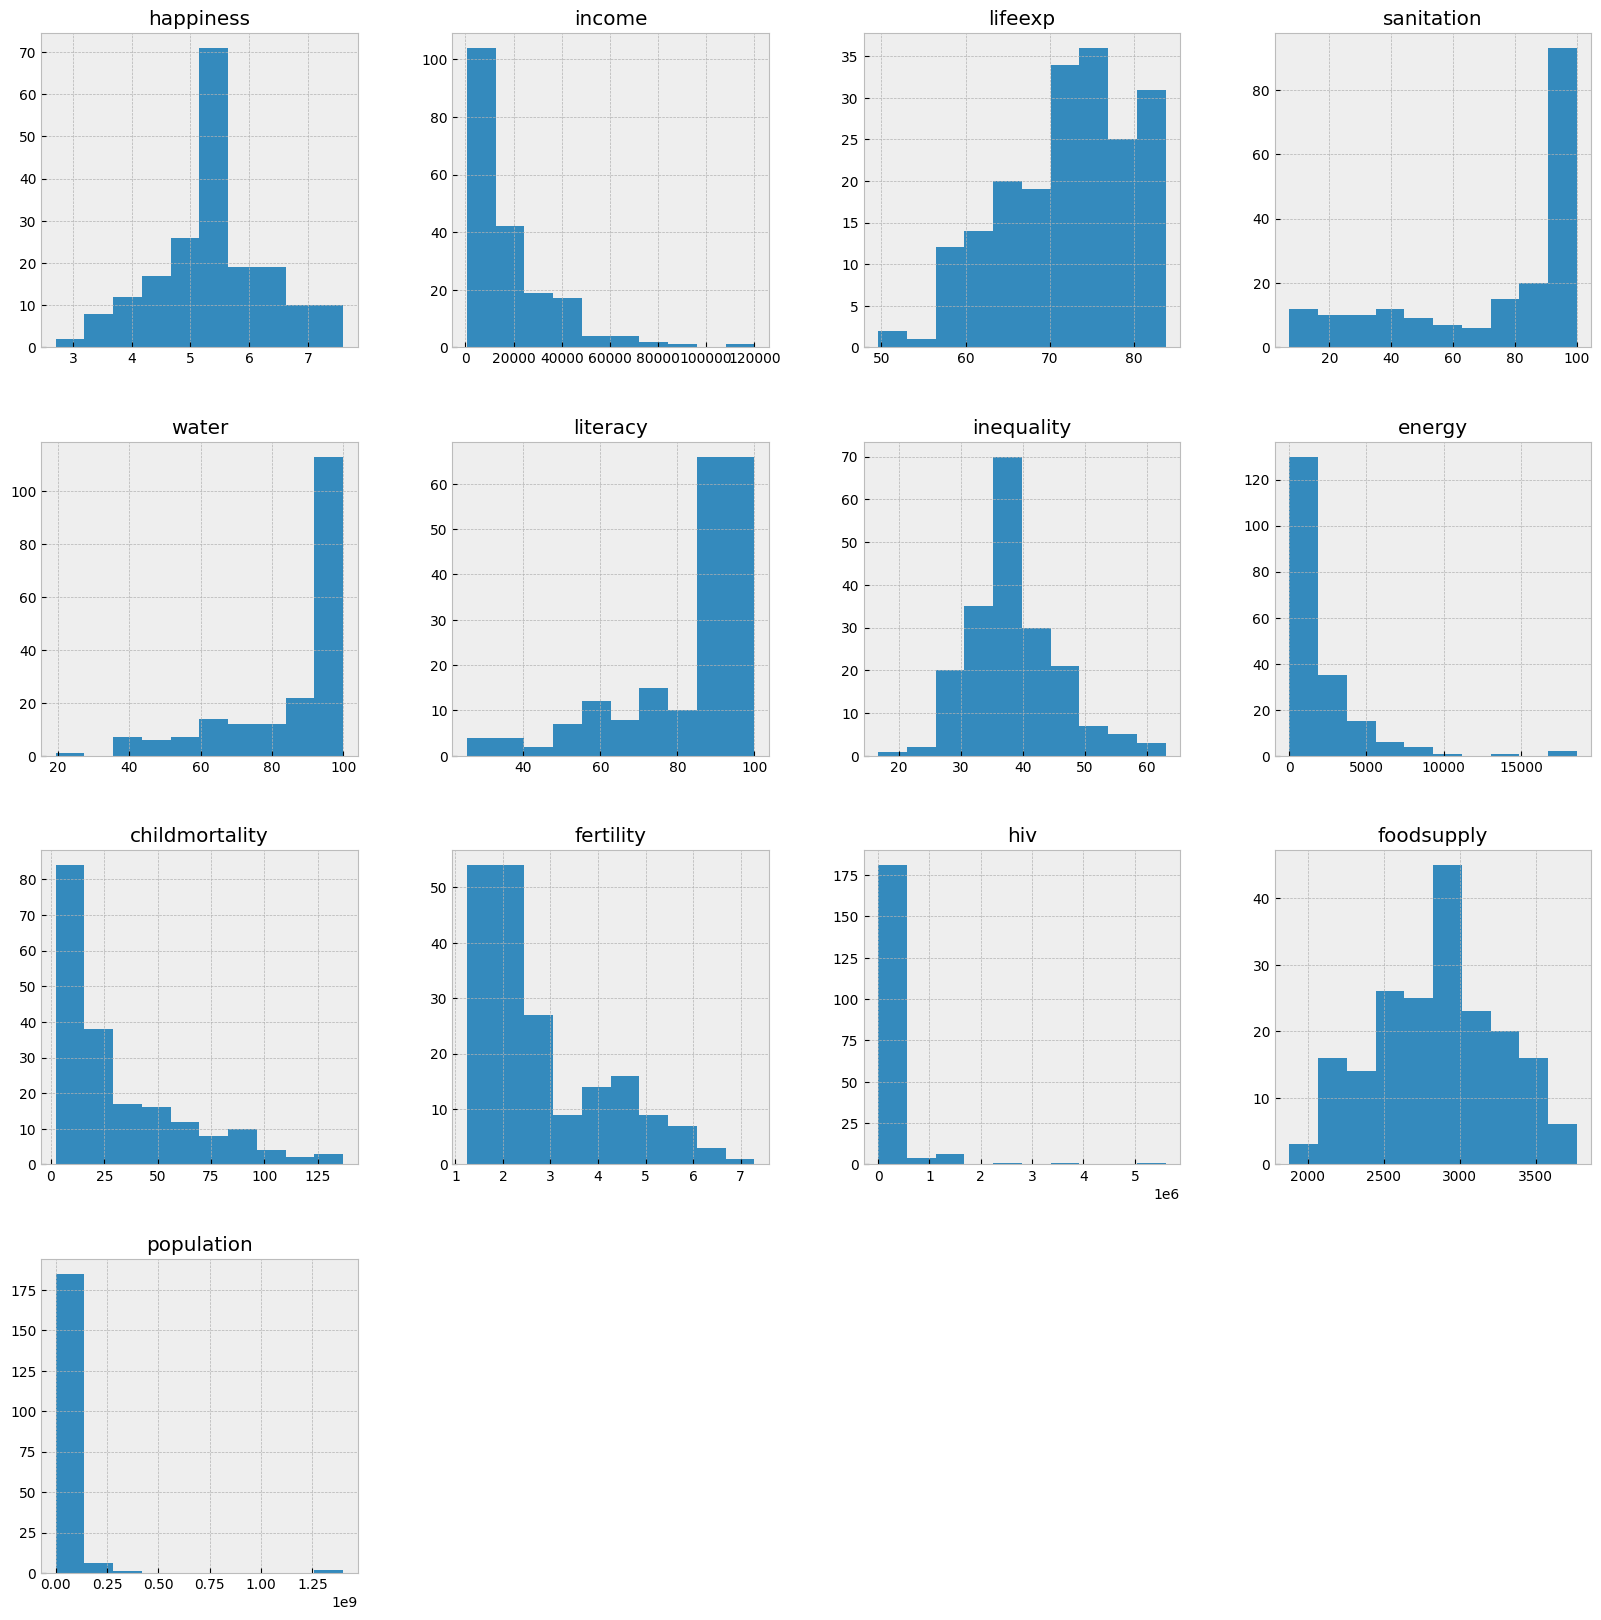

In [36]:
# Histogram plot
dataset.hist(figsize=(20,20))
plt.show()

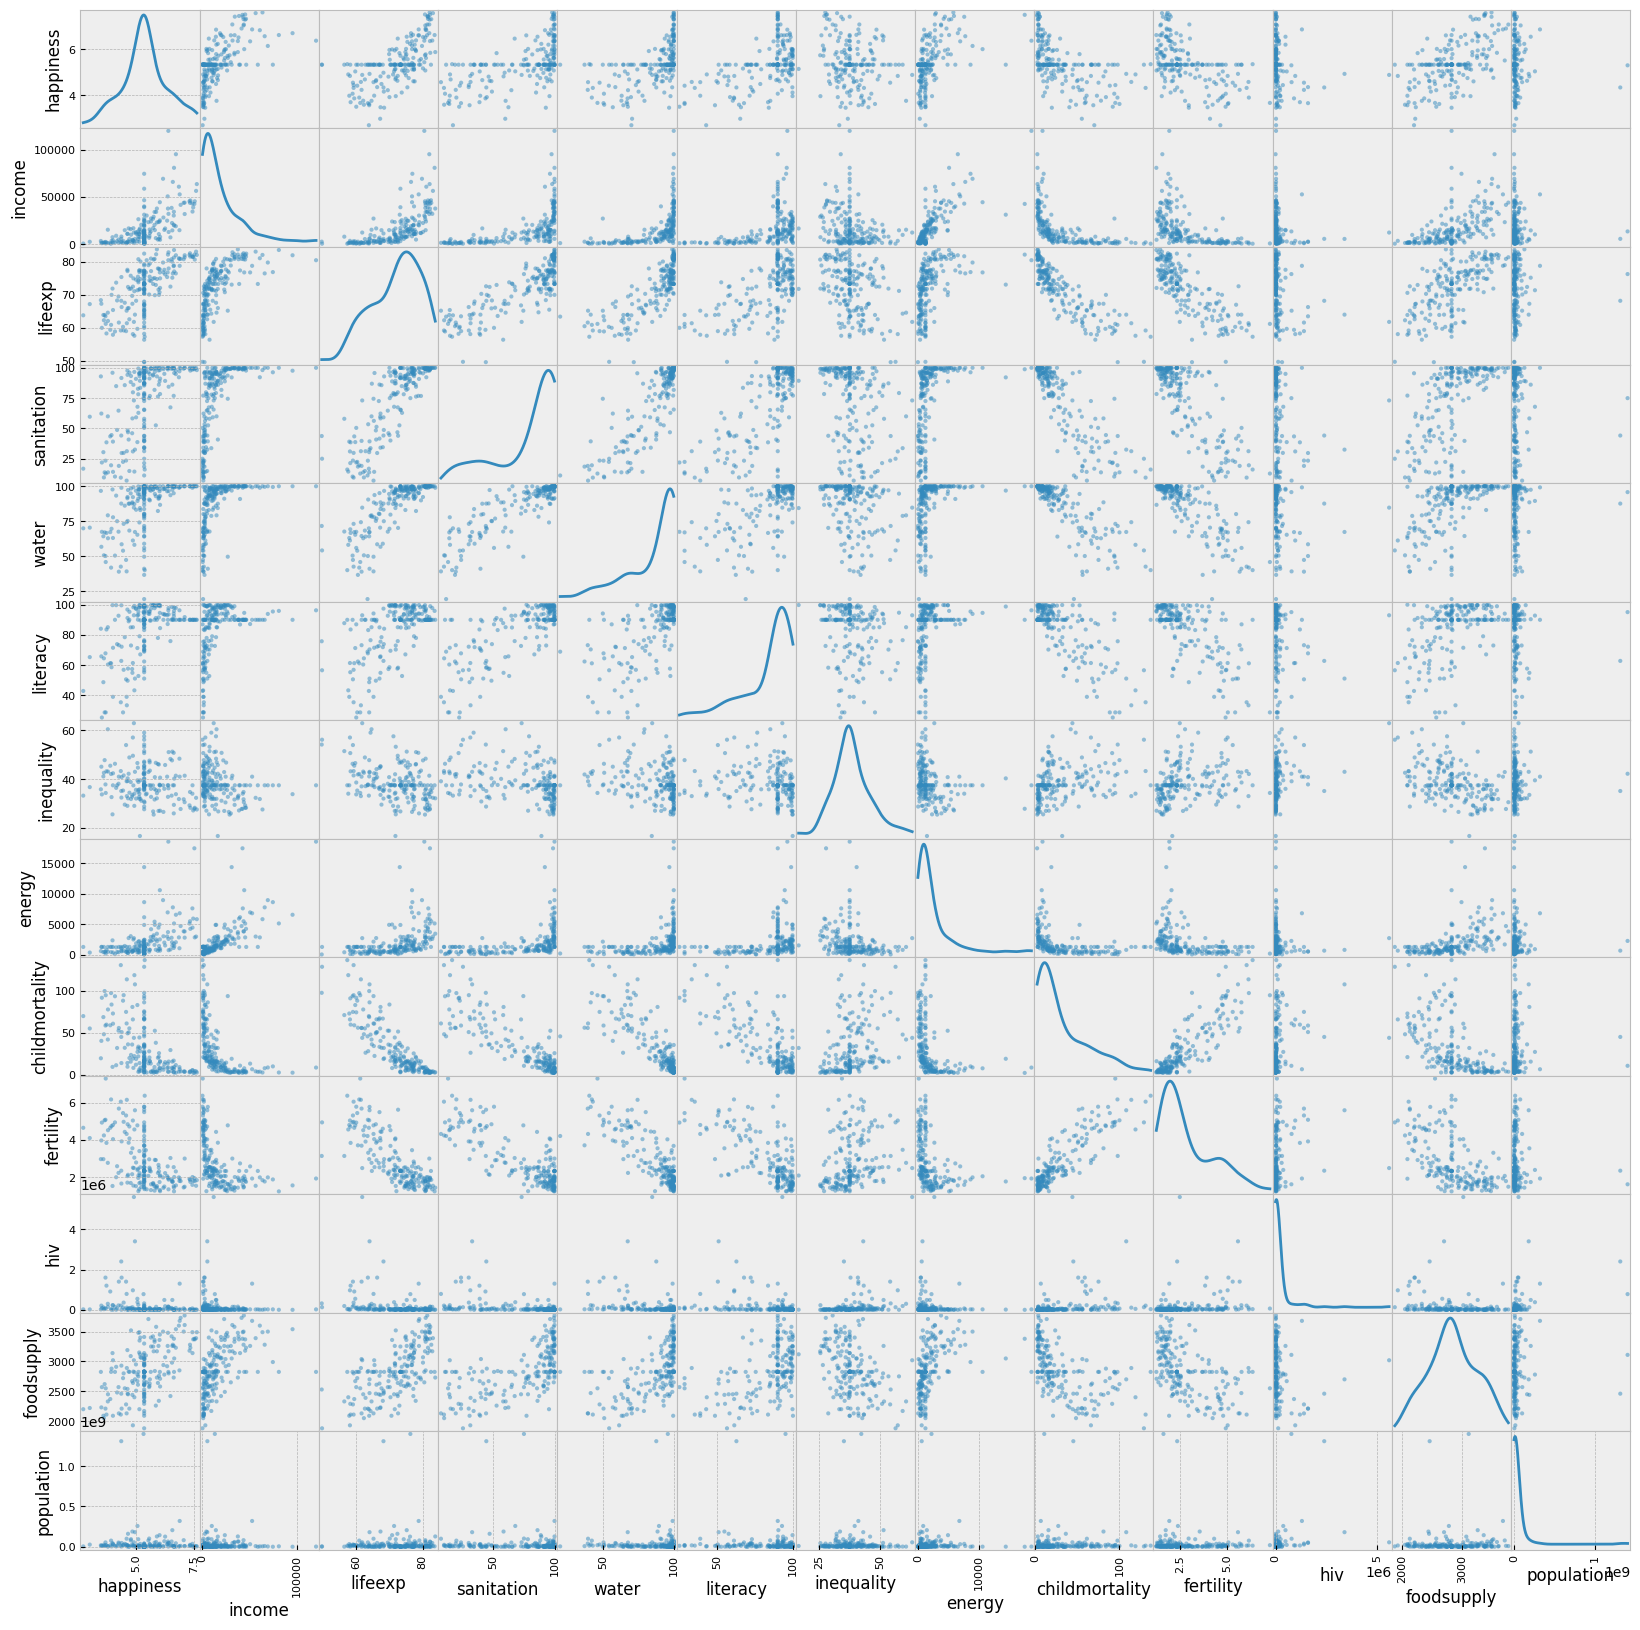

In [37]:
# Scatter plot
scatterMatrix(dataset)

## Prepare data

### Select features

In [38]:
dataset.columns

Index(['country', 'happiness', 'income', 'lifeexp', 'sanitation', 'water',
       'literacy', 'inequality', 'energy', 'childmortality', 'fertility',
       'hiv', 'foodsupply', 'population'],
      dtype='object')

In [39]:
y = dataset["lifeexp"]
X = dataset[['happiness', 'income', 'sanitation', 'water', 'literacy', 'inequality', 'energy', 'childmortality', 'fertility',  'hiv', 'foodsupply', 'population']]

### Scale features

In [40]:
# Rescale the data
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)

# Convert X back to a Pandas DataFrame, for convenience
X = pd.DataFrame(rescaledX, index=X.index, columns=X.columns)

## Build models

### Split into test and training sets

In [41]:
test_size = 0.33
seed = 1
X_train, X_test, Y_train, Y_test =  train_test_split(X, y, test_size=test_size, random_state=seed)

### Create multiple models, fit them and check them

In [42]:
# Create and check a number of models
models = [DecisionTreeRegressor(), LinearRegression(), KNeighborsRegressor(), SVR(gamma='auto')]

for model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_train)
    print(type(model).__name__, mean_absolute_error(Y_train, predictions))

DecisionTreeRegressor 0.0
LinearRegression 2.2587264468079935
KNeighborsRegressor 2.1182945736434107
SVR 3.5519799999111004


## Evaluate models

In [43]:
# Evaluate the models
for model in models:
    predictions = model.predict(X_test)
    print(type(model).__name__, mean_absolute_error(Y_test, predictions))

DecisionTreeRegressor 2.8723076923076927
LinearRegression 2.442074930603408
KNeighborsRegressor 2.5861538461538487
SVR 3.6361778146805217


In [44]:
# Choose best model
model = models[1]

In [45]:
# See predictions made
predictions = model.predict(X_test)
df = X_test.copy()
df['Prediction'] = predictions
df['Actual'] = Y_test
df["Error"] = Y_test - predictions
df

,happiness,income,sanitation,water,literacy,inequality,energy,childmortality,fertility,hiv,foodsupply,population,Prediction,Actual,Error
44,0.262009,0.027702,0.077701,0.724907,0.618474,0.556034,0.017505,0.436202,0.462810,0.041061,0.603175,1.970658e-02,62.805731,65.4,2.594269
172,0.536419,0.097816,0.629789,1.000000,0.866131,0.449353,0.066724,0.247774,0.180992,0.004275,0.500000,2.142874e-07,70.591564,73.3,2.708436
163,0.536419,0.010446,0.352131,0.558860,0.866131,0.439655,0.005617,0.398368,0.404959,0.004275,0.613757,7.214342e-05,65.182936,61.6,-3.582936
35,0.420443,0.079387,0.926819,0.980173,0.638554,0.327586,0.043324,0.159496,0.342149,0.001686,0.867725,6.699267e-02,75.249228,71.9,-3.349228
136,0.484455,0.042278,0.765390,0.890954,0.911647,0.392241,0.034718,0.146884,0.119008,0.044633,0.460317,6.684981e-02,72.107093,74.3,2.192907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,0.536419,0.038257,0.930047,0.998761,0.986613,0.450431,0.029984,0.108309,0.403306,0.004275,0.500000,6.785768e-05,73.206977,70.3,-2.906977
18,0.350346,0.007765,0.165949,0.428748,0.045515,0.403017,0.066724,0.640208,0.694215,0.021418,0.444444,1.292082e-02,62.326467,60.3,-2.026467
159,0.536419,0.101167,0.766466,0.945477,0.866131,0.449353,0.041549,0.100890,0.147107,0.004275,0.301587,6.857197e-05,73.217539,71.4,-1.817539
113,0.445901,0.098654,0.710504,0.810409,0.906292,1.000000,0.144721,0.310831,0.206612,1.000000,0.603175,3.949245e-02,66.849542,61.8,-5.049542


## Interpret model

### Intepret linear regression model

In [46]:
models[1].coef_

array([  5.71430811,   8.79838432,   5.77519864,   2.46221825,
        -5.10934704,  -3.12920156,  -5.11421481, -15.13317762,
        -1.2200665 ,  -0.25815003,   2.27649698,   2.6176061 ])

In [47]:
models[1].intercept_

69.57231211493148

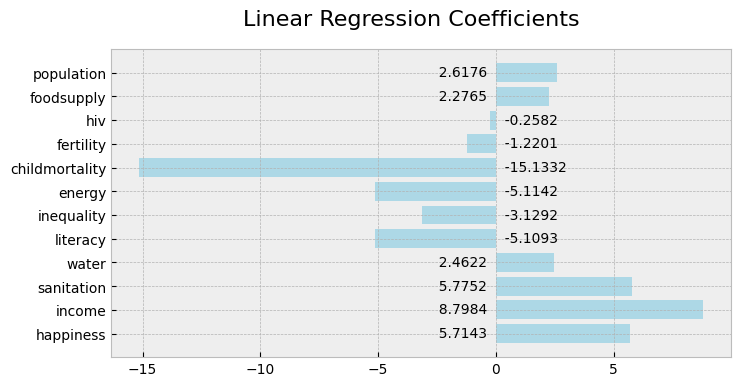

In [48]:
linearRegressionSummary(models[1], X.columns)

### Interpret knn model

In [49]:
# Distances for k nearest neighbours to each point
models[2].kneighbors(X)

(array([[0.        , 0.3821023 , 0.38650549, 0.42936956, 0.49948467],
        [0.        , 0.20540864, 0.20831799, 0.23226123, 0.26556286],
        [0.        , 0.12274953, 0.1953064 , 0.22064946, 0.22207317],
        [0.        , 0.15899222, 0.20540864, 0.22826679, 0.2762244 ],
        [0.13327753, 0.13984411, 0.16216559, 0.16956607, 0.18772587],
        [0.10256832, 0.15520456, 0.24629633, 0.24943538, 0.25508778],
        [0.        , 0.35737058, 0.38793799, 0.38953126, 0.39317685],
        [0.        , 0.32297766, 0.33489438, 0.36421898, 0.42371703],
        [0.        , 0.1962574 , 0.3429965 , 0.44393928, 0.51031135],
        [0.        , 0.12677335, 0.18037416, 0.18620954, 0.22384403],
        [0.        , 0.1768139 , 0.24628597, 0.25110484, 0.26795007],
        [0.49949621, 0.50343684, 0.52245853, 0.52732276, 0.53647266],
        [0.        , 0.28467293, 0.3429965 , 0.46834597, 0.48062858],
        [0.        , 0.31134313, 0.31645296, 0.35962904, 0.36441536],
        [0.15281102,

In [50]:
# Actual nearest neighbour points
g = models[2].kneighbors_graph(X).toarray()

In [51]:
# First data point's nearest neighbours
g[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

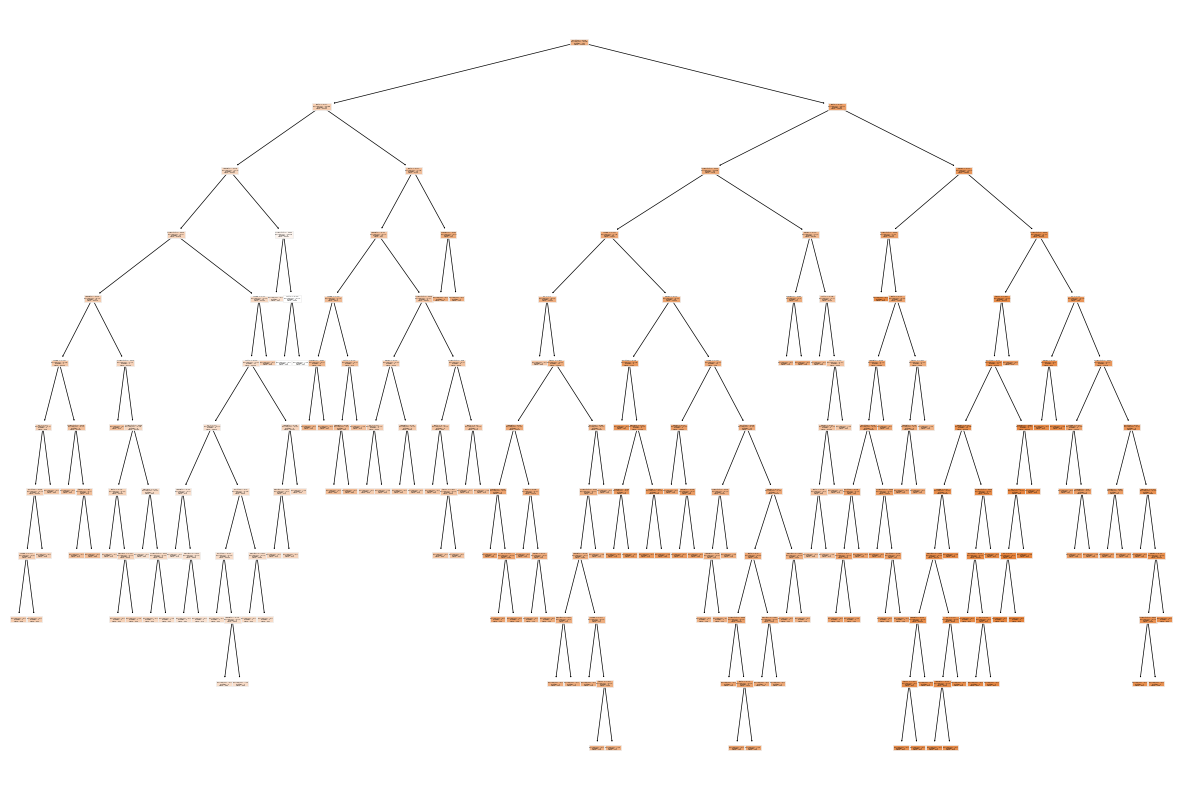

In [52]:
# Plotando a árvore de decisão
plt.figure(figsize=(15, 10))
plot_tree(models[0], filled=True, feature_names=X.columns.tolist())
plt.show()